# Batch Gradient Descent vs Stochastic Gradient Descent

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from time import  time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df=pd.read_csv('data.csv', header=None)
df

,0,1
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


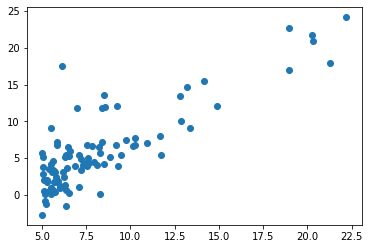

In [3]:
plt.scatter(df[0],df[1])

In [4]:
poly=PolynomialFeatures(degree=3)

X=df[0].values
y=df[1].values

X=X.reshape((X.shape[0],1))
X=poly.fit_transform(X)
X=X/X.max()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=100)

In [5]:
times=dict()       #Creating a dictionary to store the times of training of different Gradient Descent Techniques

In [6]:
from Linear_Regression import LinearRegressionMGD     #importing my created Linear_Regression class

# Applying BGD

In [7]:
model=LinearRegressionMGD()            

In [8]:
#To apply Batch Gradient Descent, we pass the batch_size to be the length of the dataset
start_time=time()
model.fit(X_train,y_train, lr=1e-2, batch_size=len(X_train), epochs=3000, threshold=1e-8, show_epochs=500)
times['BGD']=time()-start_time

 Epoch: 500 Cost: 1441.566649705266 
 Epoch: 1000 Cost: 1173.3037496881177 
 Epoch: 1500 Cost: 1005.1982177827518 
 Epoch: 2000 Cost: 899.8556045346502 
 Epoch: 2500 Cost: 833.8429393957496 
 Epoch: 3000 Cost: 792.4761137372927 


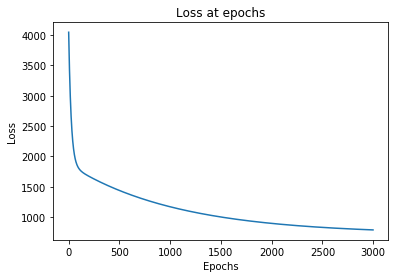

In [9]:
# Plotting of the cost at epoch for BGD
plt.plot(range(len(model.costs)), model.costs)
plt.title('Loss at epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [10]:
#r2 score prediction
from sklearn.metrics import r2_score
y_pred=model.predict(X_test)
r2_score(y_test,y_pred)

0.6253623165055229

#  Applying SGD (Batch size = 10 )

In [11]:
model1=LinearRegressionMGD()

In [12]:
start_time=time()
model1.fit(X_train,y_train, lr=1e-2, batch_size=10, epochs=3000, threshold=1e-8, show_epochs=500) # Note original X_train size is 77
times['SGD(size=10)']=time()-start_time

 Epoch: 500 Cost: 765.9849156975221 
 Epoch: 1000 Cost: 724.6727481092912 
 Epoch: 1500 Cost: 723.0988175829168 
 Epoch: 2000 Cost: 723.0226152194413 
 Epoch: 2500 Cost: 723.022051990085 
 Epoch: 3000 Cost: 723.0598995546047 


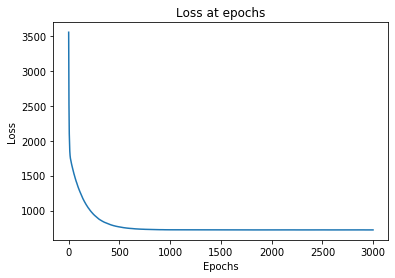

In [13]:
# Plotting of the cost at epoch for SGD(Batch Size=10)
plt.plot(range(len(model1.costs)), model1.costs)
plt.title('Loss at epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [14]:
#r2 score prediction
from sklearn.metrics import r2_score
y_pred=model1.predict(X_test)
r2_score(y_test,y_pred)

0.5856456352527437

# Applying SGD (Batch size = 1 )

In [15]:
model2=LinearRegressionMGD()

start_time=time()
model2.fit(X_train,y_train, lr=1e-2, batch_size=1, epochs=3000, threshold=1e-8, show_epochs=500) # Note original X_train size is 77
times['SGD(size=1)']=time()-start_time

 Epoch: 500 Cost: 722.9672777249247 
 Epoch: 1000 Cost: 722.9376261373975 
 Epoch: 1500 Cost: 722.8223612332281 
 Epoch: 2000 Cost: 722.7592616914367 
 Epoch: 2500 Cost: 724.1102714027302 
 Epoch: 3000 Cost: 723.1873648477979 


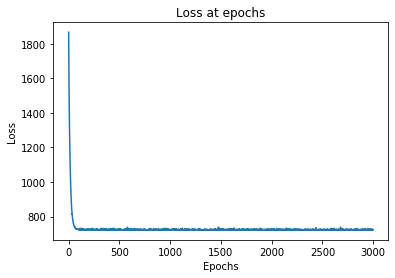

In [16]:
# Plotting of the cost at epoch for SGD(Batch Size=1)
plt.plot(range(len(model2.costs)), model2.costs)
plt.title('Loss at epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [17]:
#r2 score prediction
from sklearn.metrics import r2_score
y_pred=model2.predict(X_test)
r2_score(y_test,y_pred)

0.588600527396977

# Comparing

1.In terms of cost reduction

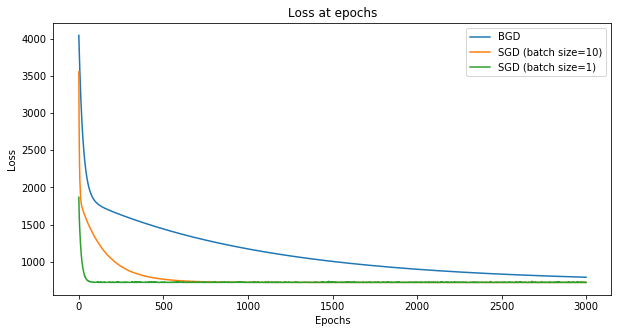

In [18]:
plt.subplots(figsize=(10,5))
plt.plot(range(len(model.costs)), model.costs, label='BGD')
plt.plot(range(len(model1.costs)), model1.costs, label='SGD (batch size=10)')
plt.plot(range(len(model2.costs)), model2.costs, label='SGD (batch size=1)')
plt.title('Loss at epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

From this graph I can conclude that:
- BGD took more number of epochs to get below 1000
- SGD with Batch size= 1 took very very less time to reach the minimum cost (less than 100 epochs to reach minima)
- SGD with Batch size= 10 took medium amount of epochs to reach minimum cost (almost 500 epochs but still better than Batch GD)

2.In terms of Training Time

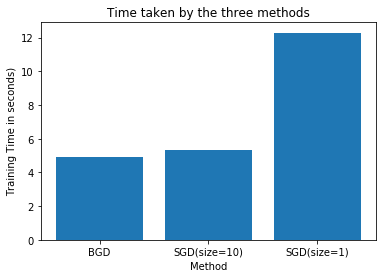

In [19]:
plt.bar(times.keys(),times.values())
plt.title('Time taken by the three methods')
plt.xlabel('Method')
plt.ylabel('Training Time in seconds)')
plt.show()

From this bar plot I can conclude that :
   SGD with batch size= 10 took almost the same time as BGD and
   SGD with batch_size= 1 took too much time

3.In terms of R2_score

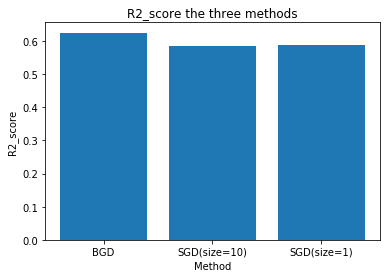

In [20]:
plt.bar(['BGD','SGD(size=10)','SGD(size=1)'],
          [r2_score(y_test,model.predict(X_test)),r2_score(y_test,model1.predict(X_test)),r2_score(y_test,model2.predict(X_test))])
plt.title('R2_score the three methods')
plt.xlabel('Method')
plt.ylabel('R2_score')
plt.show()

From this bar plot I can conclude that : All of these 3 methods are able to predict with almost the same r2_score